# <span style='color:OrangeRed'>V6 - Normalformen in Zustandsraumdarstellung</span>

In [1]:
from systheo2functions import *
%matplotlib inline

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir arbeiten zunächst mit der folgenden Zustandsraumdarstellung:
<br><br>    $A$ = $\left[ \begin{array}{rrrr}
           -1 & 0  \\
          1 & -2  \\
          \end{array}\right] $
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           1   \\
           0   \\
          \end{array}\right] $
<br><br>    $C$ =  $\left[ \begin{array}{rrrr}
           0 & 1  \\
           \end{array}\right] $
<br><br>    $D$ = $0$ .

In [2]:
A = np.array([[-1, 0],
              [1, -2]])
    
B = np.array([[1],[0]])

C = np.array([0,1])

D = np.array([0])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Tranformationsmatrix <code>V</code> ist gegeben:

In [3]:
V = np.array([[1,0],
              [1,1]])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Damit sieht die inverse Transformationsmatrix <code>V1</code> wie folgt aus:

In [4]:
V1= np.array([[1,0],
              [-1,1]])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Jetzt transfomieren wir die Matrizen auf Diagonalform:
    <br><br>$A_{neu}$=$V^{-1}AV$ = $\left[ \begin{array}{rrrr}
           -1 & 0  \\
          0 & -2  \\
          \end{array}\right] $
    <br><br>$B_{neu}$=$V^{-1}B$ =  $\left[ \begin{array}{rrrr}
           1   \\
           -1   \\
          \end{array}\right] $
    <br><br>$C_{neu}$=$CV$ =  $\left[ \begin{array}{rrrr}
           1 & 1  \\
           \end{array}\right] $
    <br>

In [5]:
#Gewünschte Matrizen:

A_neu = np.array([[-1,0],
                  [0,-2]])

B_neu = np.array([[1],
                  [-1]])

C_neu = np.array([1,1])

In [6]:
#Berechnung mit matmul aus dem Python-Modul numpy:

Adc = np.matmul(np.matmul(V1,A),V)
print("Adc=V1*A*V:\n"+str(Adc)+"\n")

Bd = np.matmul(V1,B)
print("Bd=V1*B:\n"+str(Bd)+"\n")

Cd = np.matmul(C,V)
print("Cd=C*V:\n"+str(Cd)+"\n")

Adc=V1*A*V:
[[-1  0]
 [ 0 -2]]

Bd=V1*B:
[[ 1]
 [-1]]

Cd=C*V:
[1 1]



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<b>Frage</b>: Überprüfen Sie, ob das transformierte System eine diagonale  Normalform hat?

In [7]:
if np.array_equal(Adc,A_neu):
    print("Transformationsmatrix erfolgreich verifiziert.")

Transformationsmatrix erfolgreich verifiziert.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
In den folgenden Codeabschnitten bilden wir das nachfolgende Simulinkmodell nach.
Gegeben sind zwei Zustandsraumdarstellungen samt Ausganggrößen:

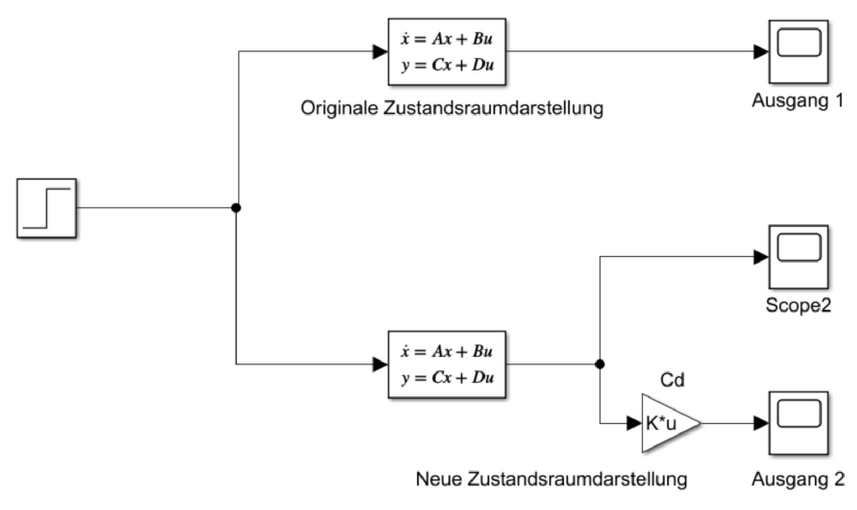

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst untersuchen wir das Ausgangsignal von der „originalen“
Zustandsraumdarstellung :

In [8]:
import sys
sys.path.append('Pysim')

from Schema import Schema
from Block import StepSource, StateSpace

tini = 0 # Start time
tfinal = 7 # End time
dt = 0.01 # Time Step
nflows = 6 #Number of data flows in the schematic, Zahlenwert entspricht nicht dem in Matlab (hier um 2 größer)

xo = np.array([[0],[0]])

sc = Schema(tini,tfinal,dt,nflows) # Instance of the simulation schematic

c1 = StepSource(1,0,1,1) #StepSource(out,startv,endv,ts)
c2 = StateSpace([1],[2],A,B,C,D,xo) #StateSpace(inp,out,A,B,C,D,xo)
c3 = StateSpace([1],[3],Adc,Bd,np.array([0, 1]),np.array([0]),xo)
c4 = StateSpace([1],[4],Adc,Bd,np.array([1, 0]),np.array([0]),xo)
c5 = StateSpace([1],[5],Adc,Bd,Cd,np.array([0]),xo)

sc.AddListComponents(np.array([c1,c2,c3,c4,c5]));

#Run the schematic and plot:
out = sc.Run(np.array([1, 2, 3, 4, 5])); #Nummern  der zurückgegebene Listen um eins kleiner als in Matlab

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Unter „Ausgang 1“ stellen wir das Ausgangsignal von der „originalen“
Zustandsraumdarstellung dar:

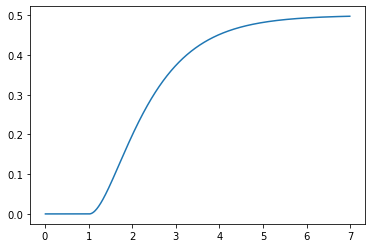

In [9]:
#Ausgang 1
plt.plot(out[0,:],out[2,:]);
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Unter „Ausgang 2“ können wir das Ausgangsignal von der „modifizierten“
Zustandsraumdarstellung in Normalform untersuchen:

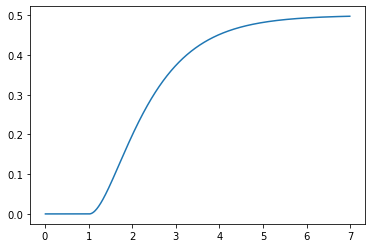

In [10]:
#Ausgang 2
plt.plot(out[0,:],out[5,:]);
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
 Scope 2:

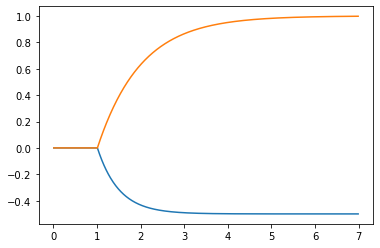

In [14]:
#Scope 2:
plt.plot(out[0,:],out[3,:],out[0,:],out[4,:]);
plt.show()